In [2]:
# Importing libraries required for the project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Read the CSV file into a DataFrame

df = pd.read_csv('data/car_data.csv')

# Display first five rows of the DataFrame

print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type   
0     ritz  2014           3.35           5.59       27000    Petrol  \
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [6]:
# Get basic statistics of DF

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# Checking DF with missing values 

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [12]:
df['Seller_Type'].value_counts()


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [13]:
df['Transmission'].value_counts()


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [14]:
# label encoding the values

df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

In [15]:
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

In [16]:
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)


In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
x = df.drop(['Car_Name', 'Selling_Price'], axis=1)

In [19]:
y = df['Selling_Price']

In [20]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [21]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [23]:
# a test size of 0.2 means that 20% of the data will be used for testing, while 80% will be used for training.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Training

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
prediction = model.predict(X_test)

In [27]:
prediction

array([ 2.96670467,  8.3025584 ,  6.05620758, -1.46814968,  9.25713882,
        7.032306  ,  1.35164871,  0.8268692 ,  1.37173108,  7.10742891,
        8.74382695,  0.58613312,  8.50347194,  3.42803571,  6.50183791,
        3.08701389,  0.46323861, 10.8959559 ,  1.76487652,  2.36736645,
        0.37538646,  7.73247978,  6.2075281 ,  2.64722707,  0.78232086,
        3.72073841,  5.33393873,  2.83824054,  2.16090172,  1.77220708,
        0.37859447,  8.79078642, -0.7007019 ,  2.2988819 ,  8.21516023,
        4.54037167,  7.35322104,  7.6823757 ,  2.91768184,  8.08080852,
        3.99669454,  4.34672417,  4.36388106,  0.61018923,  6.94478948,
        0.47281585,  7.41596672, 11.44059317,  3.14822313,  4.95097368,
        6.86250813,  2.19862524, 20.53946595, 16.79146986,  7.13952545,
        9.830903  ,  4.49886186,  8.62078376,  1.810855  ,  7.67299866,
        0.21098592])

In [28]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

### 

### Viusalization 

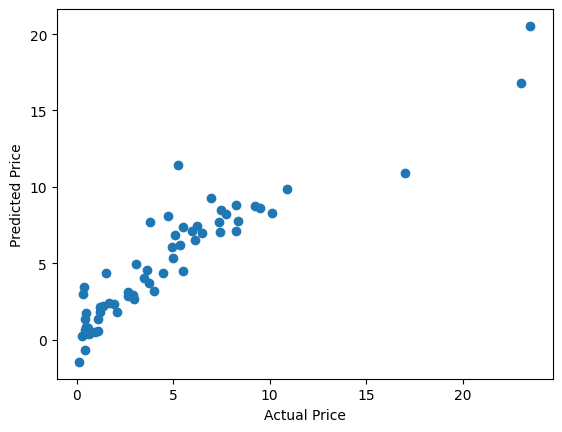

In [29]:
plt.scatter(y_test, prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

#### MAE is a Pandas metric that measures the average absolute difference between predicted and true values in a regression model.

In [30]:
mae = metrics.mean_absolute_error(y_test, prediction)
print("Mean absolute error: ", mae)

Mean absolute error:  1.2217615462341054
